In [4]:
import os 
ANILINE =-139.0771291
ZINC100 =  -22154.73868

ANILINE_ZINC = ANILINE + ZINC100
## TU 
(-22293.83249270-ANILINE_ZINC)* 2625.49884478051
(-22293.83535801-ANILINE_ZINC)* 2625.49884478051
## LEAN
# ( -22293.86094966-ANILINE_ZINC)* 2625.49884478051
(  -22293.86925985 -ANILINE_ZINC)* 2625.49884478051

-140.33488238159654

C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_16948\1182689245.py:71: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_16948\1182689245.py:71: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_16948\1182689245.py:71: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_16948\1182689245.py:71: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_16948\1182689245.py:71: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_16948\1182689245.py:71: UserWarning: Glyph 48143 (\N{HANGU

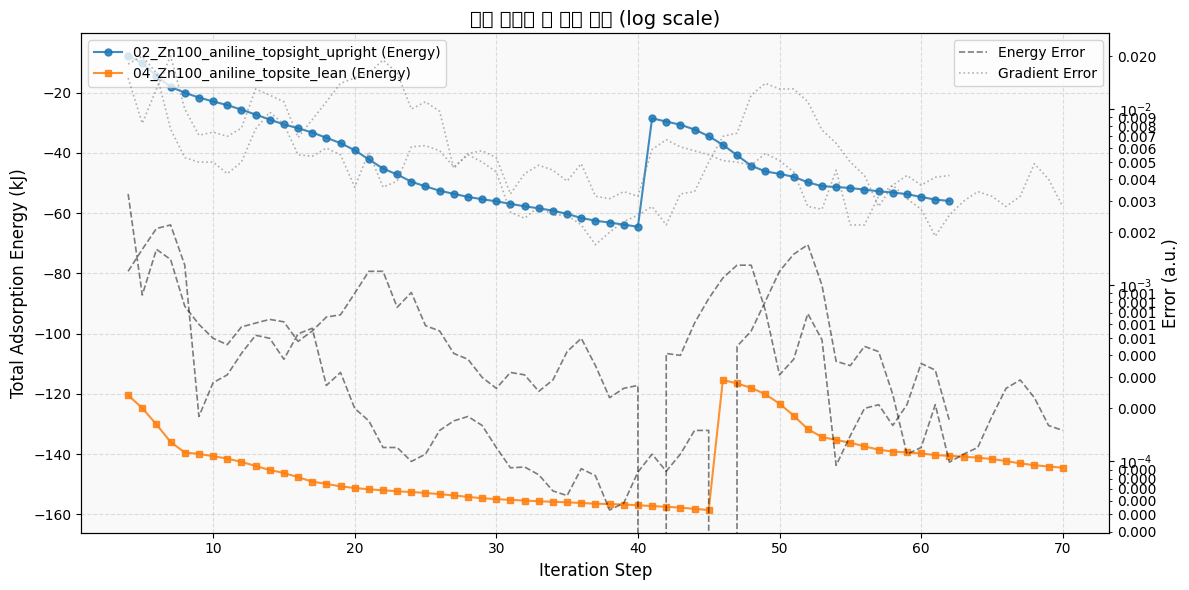

In [5]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter

# seaborn 스타일 적용
plt.style.use("seaborn-v0_8-muted")


colors = plt.cm.tab10.colors
markers = ['o', 's', '^', 'D', 'P', '*', 'X', '<', 'v', '>']  # 마커 종류

dirs = [x for x in os.listdir() if os.path.isdir(x)]

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# error 항목 범례에 추가할 수 있도록 flag 사용
error_plotted = {"energy_error": False, "gradient_error": False}

for idx, d in enumerate(dirs):
    csv_files = [x for x in os.listdir(d) if x.endswith(".csv")]
    if not csv_files:
        continue
    
    df = pd.read_csv(os.path.join(d, csv_files[0]))
    df["ad_energy_kj"] = (df["energy"] - ANILINE_ZINC) * 2625.49884478051
    df = df.iloc[4:]

    color = colors[idx % len(colors)]
    marker = markers[idx % len(markers)]

    # 좌측 축: 흡착 에너지
    ax1.plot(df.index, df["ad_energy_kj"], label=f"{d} (Energy)",
             color=color, marker=marker, markersize=5, linewidth=1.5, alpha=0.85)

    # 우측 축: 공통 색상으로 에러 표시 (한 번만 legend에 추가)
    if not error_plotted["energy_error"]:
        ax2.plot(df.index, df["energy_error"], label="Energy Error",
                 color="black", linestyle='--', linewidth=1.2, alpha=0.5)
        error_plotted["energy_error"] = True
    else:
        ax2.plot(df.index, df["energy_error"], color="black", linestyle='--', linewidth=1.2, alpha=0.5)

    if not error_plotted["gradient_error"]:
        ax2.plot(df.index, df["gradient_error"], label="Gradient Error",
                 color="gray", linestyle=':', linewidth=1.2, alpha=0.6)
        error_plotted["gradient_error"] = True
    else:
        ax2.plot(df.index, df["gradient_error"], color="gray", linestyle=':', linewidth=1.2, alpha=0.6)

# y축 설정
ax1.set_xlabel("Iteration Step", fontsize=12)
ax1.set_ylabel("Total Adsorption Energy (kJ)", fontsize=12)
ax2.set_ylabel("Error (a.u.)", fontsize=12)
ax2.set_yscale("log")
ax2.yaxis.set_major_locator(LogLocator(base=10.0))
ax2.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))
ax2.yaxis.set_minor_formatter(ScalarFormatter())

# 배경, 그리드
ax1.set_facecolor("#f9f9f9")
ax1.grid(True, linestyle='--', alpha=0.4)

# 범례 두 개 따로
legend1 = ax1.legend(loc="upper left", fontsize=10, frameon=True)
legend2 = ax2.legend(loc="upper right", fontsize=10, frameon=True)

# 제목 및 출력
plt.title("흡착 에너지 및 에러 변화 (log scale)", fontsize=14)
plt.tight_layout()
plt.show()


In [8]:
df_bfgs

,Unnamed: 0,index,energy,energy_error,gradient_error,ad_energy_kj
